In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb  # You can replace this with any other dataset
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
vocab_size = 10000
max_len = 200

# Splitting data into training and testing sets
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

# Preprocessing: Padding sequences to have a consistent length
train_data = pad_sequences(train_data, maxlen=max_len)
test_data = pad_sequences(test_data, maxlen=max_len)


In [ ]:
# Train GRU model
gru_history = gru_model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_data=(test_data, test_labels))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 293s 740ms/step - accuracy: 0.6866 - loss: 0.5643 - val_accuracy: 0.8207 - val_loss: 0.4158
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 327s 753ms/step - accuracy: 0.8847 - loss: 0.2821 - val_accuracy: 0.8521 - val_loss: 0.3416
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 252s 644ms/step - accuracy: 0.9236 - loss: 0.2002 - val_accuracy: 0.8626 - val_loss: 0.3469
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 262s 643ms/step - accuracy: 0.9543 - loss: 0.1309 - val_accuracy: 0.8695 - val_loss: 0.3538
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 258s 634ms/step - accuracy: 0.9747 - loss: 0.0802 - val_accuracy: 0.8650 - val_loss: 0.4262


In [ ]:
# Build GRU model
gru_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification for IMDB
])

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Text generation using the trained GRU model - this would need more specific data for text gen
def generate_text_gru(seed_text, next_words, model, tokenizer, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word = tokenizer.index_word[predicted.argmax()]
        seed_text += " " + predicted_word
    return seed_text


In [ ]:
gru_loss, gru_accuracy = gru_model.evaluate(test_data, test_labels)
print(f"GRU Accuracy: {gru_accuracy}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.5027 - loss: 0.6928
GRU Accuracy: 0.5081200003623962


In [ ]:
# Build LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

# Train LSTM model
lstm_history = lstm_model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_data=(test_data, test_labels))

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(test_data, test_labels)
print(f"LSTM Accuracy: {lstm_accuracy}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 271s 685ms/step - accuracy: 0.7041 - loss: 0.5432 - val_accuracy: 0.8459 - val_loss: 0.3602
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 323s 688ms/step - accuracy: 0.8936 - loss: 0.2711 - val_accuracy: 0.8715 - val_loss: 0.3077
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 298s 626ms/step - accuracy: 0.9309 - loss: 0.1855 - val_accuracy: 0.8669 - val_loss: 0.3441
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 263s 630ms/step - accuracy: 0.9512 - loss: 0.1377 - val_accuracy: 0.8622 - val_loss: 0.3637
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 263s 632ms/step - accuracy: 0.9660 - loss: 0.1011 - val_accuracy: 0.8607 - val_loss: 0.4044
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.8597 - loss: 0.4142
LSTM Accuracy: 0.8607199788093567


GRU Accuracy: 0.5081200003623962
LSTM Accuracy: 0.8607199788093567


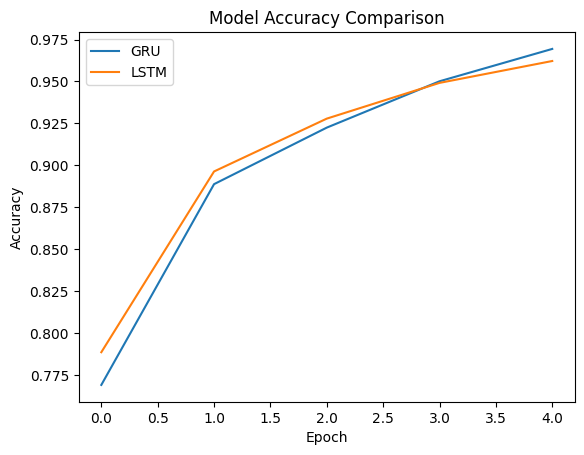

In [ ]:
print(f"GRU Accuracy: {gru_accuracy}")
print(f"LSTM Accuracy: {lstm_accuracy}")

# Plot the training histories for comparison
import matplotlib.pyplot as plt

plt.plot(gru_history.history['accuracy'], label='GRU')
plt.plot(lstm_history.history['accuracy'], label='LSTM')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
